In [29]:
import glob,  os   
import io
import pandas as pd
import numpy as np
from glob import glob
import numpy as np
from neupy import algorithms
from neupy.layers import *
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression

import tensorflow
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from tensorflow.python.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.metrics import r2_score


import keras
from keras.optimizers import SGD

from neupy import algorithms
from neupy.layers import *

### Lectura y procesamiento de los datos

In [30]:
filenames = glob('/home/noxd/Dropbox/REMAS/datos/datos*.csv')
filenames.sort() 

In [31]:
est_train=['ABEJAS','BACERAC (LA MISION)',  'BAVIÁCORA (LA CAPILLA)', 'BAVISPE (LANG)', 'BLOCK 1703 LOTE 6', 'BLOCK 1922',
 'BLOCK 720 LOTE 30', 'BLOCK 731 LOTE 20','BUENOS AIRES GYM','CAPETAMAYA', 'CASA COLORADA', 'CHIHUAHUITA', 'CHINO GORDO',
 'CHIPILON', 'COLONIA MEDANO','CUMPAS (LOS PINOS)','EJ. 21 DE MARZO', 'EL 15 CRISP', 'ENCINAS JOHNSON', 'ESTACIÓN CORRAL (SAN SALVADOR)',
 'HUÁSABAS (HUEVERA)', 'KINO', 'KM9 EJIDO AGUA PRIETA', 'LA LADRILLERA', 'LA REGLA', 'LA RIVERA', 'LOS ALAMITOS',
 'LOS ALGODONES','LOS CORRALES','MATAPE', 'MOCTEZUMA', 'MONUMENTOS', 'NAVOBAXIA (LAS PIOCHAS)', 'ORTIZ (LA CAMPANA)',
 'PEAÑA','PUEBLO MAYO', 'RANCHO QUIROZ', 'SAHUARAL DE OTERO', 'SAN CARLITOS', 'SANTA CRUZ (FRESNOS)', 'SANTA MARIA (ESTABLO FATIMA)',
 'SELVA', 'SONOYTA (HIGAREDA)', 'TOTOLIBOQUI', 'TRACALITA', 'SANTO NIÑO', 'QUEROBABI (EL RODEO)', 'SUAQUI GRANDE (EL TUNAL)',
 'SAHUARIPA (EL CAMPITO)','EL CARRIZO','BANÁMICHI (CADAVERACHI)',  'BLOCK 1423 LOTE 1', 'CAMPO SELZA','CUCHUJAQUI', 'GREEN STRIPE', 'LAS PALMAS','MAZATÁN (BUENOS AIRES)','NACORI CHICO (EL MOLINO)','POTAM','RANCHO EL PIVOTE','SANTA ELENA','URES (SAN JOAQUIN)','ROSARIO TESOPACO']
est_test=["SANTA MARIA (ESTABLO FATIMA)", "ABEJAS","SAHUARAL DE OTERO",
        "BLOCK 731 LOTE 20", "BLOCK 720 LOTE 30","EJ. 21 DE MARZO","BACERAC (LA MISION)","LOS ALAMITOS",
         "COLONIA MEDANO","MOCTEZUMA","MATAPE","SAN CARLITOS","SELVA"]
import random# "LOS ALGODONES",
#est_test=[]
num_to_select = 13   
for i in est_test:
    #print(i)
    est_train.remove(i)
# set the number to select here.
#list_of_random_items = random.sample(est_train, num_to_select)
#for i in range(0,num_to_select):
  #  est_test.append(list_of_random_items[i])
   # est_train.remove(list_of_random_items[i])


In [32]:
estaciones = [pd.read_csv(io.open('/home/noxd/Dropbox/REMAS/estaciones.csv', encoding='latin-1'))]
dataframes = [pd.read_csv(io.open(f, encoding='latin-1')) for f in filenames]
#https://stackoverflow.com/questions/30996289/utf8-codec-cant-decode-byte-0xf3
df = pd.concat(dataframes)
df = df[df['Estación'] != 'Estación']
estaciones1=df['Estación'].unique()
estaciones1.sort()
factores=["Temperatura_promedio","Humedad_relativa","Radiación_solar","Velocidad_del_viento",
          "Presión_barométrica","Evapotranspiración"]
lista=[]
estacion=[]
noesta=0
count_nan=[]
lista_train=[]
lista_test=[]
for index, row in estaciones[0].iterrows(): 
    if  row[0] in  estaciones1:
        df1 = df[df['Estación'] == row[0]]
        df1['Fecha'] = pd.to_datetime(df1['Fecha'])
        df1[factores] = df1[factores].astype(float)
        df1['Fecha'] =  df1['Fecha'].dt.year + df1['Fecha'].dt.month/12
        df1 = df1.groupby('Fecha').mean()
        df1 = df1.loc[:, ~df1.columns.str.contains('^Unnamed')]
        df1['Estación']=row[0]
        df1['coordenaday']=row[2] 
        df1['coordenadax']=row[3] 
        if len(df1)==68:
            noesta=noesta+1
            lista.append(df1)
            estacion.append(row[0])
            #count_nan .append( len(df1) - df1.count())

        if row[0] in est_test:
            lista_test.append(df1)
        elif row[0] in est_train:
            lista_train.append(df1)
remas = pd.concat(lista)
remas=remas.fillna(0)
Xtrain1= pd.concat(lista_train)
Xtest1= pd.concat(lista_test)
Xtrain1=Xtrain1.fillna(0)
Xtest1=Xtest1.fillna(0)

/home/noxd/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/noxd/miniconda3/lib/python3.7/site-packages/pandas/core/frame.py:3062: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/home/noxd/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

In [35]:
Xtest1.to_csv("e_prueba.csv")

In [5]:
estaciones1= np.ndarray.tolist(estaciones1) 
estaciones= np.ndarray.tolist(estaciones[0]['Estación'].values)
rta=[]
for i in range(0, len(estaciones1)):
    if estaciones1[i] not in estaciones:
        rta.append(estaciones1[i])

### Datos de entrenamiento y prueba

In [6]:
losalgodones=remas[remas["Estación"]=="LOS ALGODONES"]
losalgodones.mean()

Temperatura_promedio     24.763552
Humedad_relativa         53.300709
Radiación_solar         319.831046
Velocidad_del_viento      2.177066
Presión_barométrica     977.686205
Evapotranspiración        6.341726
coordenaday              27.470890
coordenadax            -109.126870
dtype: float64

In [7]:
Xtrain1.reset_index(level=0, inplace=True)
Xtest1.reset_index(level=0, inplace=True)

In [8]:
Rtrain=Xtrain1
Rtest=Xtest1

Xtrain1=Xtrain1.loc[:, ~Xtrain1.columns.str.contains('Radiación_solar')]
Xtrain1=Xtrain1.loc[:, ~Xtrain1.columns.str.contains('Estación')]
Xtrain1=Xtrain1.astype(float).values
Xtest1=Xtest1.loc[:, ~Xtest1.columns.str.contains('Radiación_solar')]
Xtest1=Xtest1.loc[:, ~Xtest1.columns.str.contains('Estación')]
Xtest1=Xtest1.astype(float).values



Ytrain1=Rtrain["Radiación_solar"].astype(float).values
Ytest1=Rtest["Radiación_solar"].astype(float).values
Ytrain1=Ytrain1.reshape(Ytrain1.shape[0],1)
Ytest1=Ytest1.reshape(Ytest1.shape[0],1)


### Normalizar los datos

In [9]:
#X en rango de -1 a 1
#lista para guardar valores maximos y minimos de x
def normalizar(X):
    maxminx=[]
    for i in range(0,X.shape[1]):
        x1=X[0:X.shape[0],i:i+1]
        maxi=np.nanmax(x1)
        minm=np.nanmin(x1)
        maxminx.append([maxi,minm])
        X[0:X.shape[0],i:i+1]=0.8*( (x1-minm)/(maxi-minm) ) +0.1
    return maxminx, X

maxminxtrain1, Xtrain1=normalizar(Xtrain1)
maxminxtest1, Xtest1=normalizar(Xtest1)

In [10]:
#lista para guardar valores maximos y minimos
def normalizary(Y):
    maxminy=[]
    y1=Y
    maxi=np.nanmax(y1)
    minm=np.nanmin(y1)
    maxminy.append([maxi,minm])
    Y=(0.8*( (y1-minm)/(maxi-minm) )) +0.1
    return maxminy, Y

maxminYtrain1, Ytrain1=normalizary(Ytrain1)
maxminYtest1, Ytest1=normalizary(Ytest1)


#print(np.nanmax(X),np.max(Xtest), np.max(Y),np.max(Ytest))
#print(np.nanmin(X),np.min(Xtest), np.min(Y),np.min(Ytest))
#print(Ytrain1.shape, Ytest1.shape, Xtrain1.shape,Xtest1.shape)

### Algoritmos extras

In [11]:
def logistica(X):
    f=1.0/(1.0+np.exp(-X))
    return f
def dlogistica(estimado):
    f=(estimado*(1-estimado))
    return f
def error(y,h):
    #suma de error al cuadrado
    sec=np.nansum((y-h)**2)/y.shape[0]
    #suma absoluta del error
    sae=np.nansum(abs(y-h))/y.shape[0]
    #r cauadrado
    r2=1-np.nansum((y-h)**2)/(np.nansum(  (y-np.mean(y))**2  )  )
    return sec, sae, r2
def neuronal_network(alpha, X, Y, no_nodes,iteraciones): 
    #https://iamtrask.github.io/2015/07/27/python-network-part2/
    b0=   np.random.uniform(low=-2, high=2) 
    b1=np.random.uniform(low=-2, high=2) 
    w0 = np.random.uniform(low=-2, high=2, size=(X.shape[1],no_nodes))
    w1 = np.random.uniform(low=-2, high=2, size=(no_nodes,1)) 
    for j in range(0,iteraciones):
        layer_h = logistica(np.dot(X,w0)+b0)
        estimado = logistica(np.dot(layer_h,w1))#+b1)
        delta1 = (estimado - Y)*dlogistica(estimado)
        delta0 = delta1.dot(w1.T) *dlogistica(layer_h) 
        #w0_old=w0
        #w1_old=w1
        w1 -= (alpha * layer_h.T.dot(delta1))
        w0 -= (alpha * X.T.dot(delta0))
        b0-=(alpha * np.sum(delta0))
        #b1-=(alpha * np.sum(delta1))
        #nw0=np.sum(w0-w0_old)**2
        #nw1=np.sum(w1-w1_old)**2
        #if nw0<0.0000001 and nw1<0.00000001:
          #  print('Se logro convergencia en',j,'iteraciones')
           # break
    return w0,w1,b0#,b1
def neuronal_network_sb(alpha, X, Y, no_nodes,iteraciones): 
    #https://iamtrask.github.io/2015/07/27/python-network-part2/
    #b0=   np.random.uniform(low=-2, high=2) 
    #b1=np.random.uniform(low=-2, high=2) 
    w0 = np.random.uniform(low=-2, high=2, size=(X.shape[1],no_nodes))
    w1 = np.random.uniform(low=-2, high=2, size=(no_nodes,1)) 
    for j in range(0,iteraciones):
        layer_h = logistica(np.dot(X,w0))
        estimado = logistica(np.dot(layer_h,w1))
        delta1 = (estimado - Y)*dlogistica(estimado)
        delta0 = delta1.dot(w1.T) *dlogistica(layer_h) 
        #w0_old=w0
        #w1_old=w1
        w1 -= (alpha * layer_h.T.dot(delta1))
        w0 -= (alpha * X.T.dot(delta0))
        #b0-=(alpha * np.sum(delta0))
        #b1-=(alpha * np.sum(delta1))
        #nw0=np.sum(w0-w0_old)**2
        #nw1=np.sum(w1-w1_old)**2
        #if nw0<0.0000001 and nw1<0.00000001:
          #  print('Se logro convergencia en',j,'iteraciones')
           # break
    return w0,w1#,b0,b1

### Redes

#### Optimizador quasi neutoniano de sklean (lbfgs)

In [12]:
for neurons in range(5,15,1):
    regr = MLPRegressor(random_state=1, hidden_layer_sizes=(neurons), alpha=0.001  , max_iter=1000,activation="logistic",solver="lbfgs").fit(Xtrain1, np.ravel(Ytrain1))
    print("El regresor con", neurons, "neuronas, tiene un scores de",regr.score(Xtest1, Ytest1))

El regresor con 5 neuronas, tiene un scores de 0.9267035463121857
El regresor con 6 neuronas, tiene un scores de 0.9412285530386757
El regresor con 7 neuronas, tiene un scores de 0.9445027622612107
El regresor con 8 neuronas, tiene un scores de 0.944300110303835
El regresor con 9 neuronas, tiene un scores de 0.9336422548887392
El regresor con 10 neuronas, tiene un scores de 0.9355677644211571
El regresor con 11 neuronas, tiene un scores de 0.9354031264450632
El regresor con 12 neuronas, tiene un scores de 0.933807701705628
El regresor con 13 neuronas, tiene un scores de 0.9346948825660624
El regresor con 14 neuronas, tiene un scores de 0.9223886927945375


In [13]:
regr = MLPRegressor(random_state=1, hidden_layer_sizes=(12), alpha=0.001  , max_iter=500,activation="logistic",solver="lbfgs").fit(Xtrain1, np.ravel(Ytrain1))

estimado=regr.predict(Xtrain1)
sec, sae, r2=error(Ytrain1,estimado.reshape((Ytrain1.shape[0], 1)))
print(sec, sae, r2)
estimado=regr.predict(Xtest1)
sec, sae, r2=error(Ytest1,estimado.reshape((Ytest1.shape[0], 1)))
print(sec, sae, r2)

0.0015589263516218824 0.022872033529805817 0.9100189113181356
0.0031667769687061145 0.04455498998865647 0.933807701705628


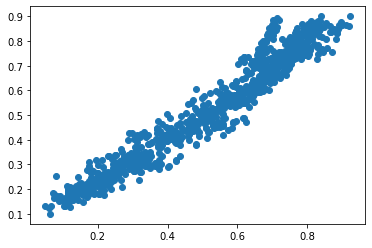

In [14]:

%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(regr.predict(Xtest1) , Ytest1)

#### Optimizador Nadam de keras

In [24]:
model = Sequential()
model.add(Dense(12, input_dim=8,use_bias=True))
model.add(Dense(1, activation='sigmoid',use_bias=True))
#model.summary() 

In [25]:
from tensorflow.keras.optimizers import Nadam
opt = Nadam(learning_rate=0.01, beta_1=0.99, beta_2=0.999, epsilon=1e-08)
#optimizer = SGD(lr=.001)
#model.compile(optimizer=optimizer, loss='mean_squared_error', metrics = ['mse'])
#history = model.fit(train_images, train_labels, validation_data=(val_images, val_labels), epochs=10, batch_size=8)
model.compile(optimizer=opt, loss='mean_squared_error', metrics = ['mse'])
history=model.fit(Xtrain1, Ytrain1, epochs=1000, batch_size=1000, verbose=1, validation_split=0.2)
predictions = model.predict(Xtest1)

Train on 2720 samples, validate on 680 samples
Epoch 1/1000
2720/2720 [==============================] - 0s 93us/sample - loss: 0.0268 - mean_squared_error: 0.0268 - val_loss: 0.0181 - val_mean_squared_error: 0.0181
Epoch 2/1000
2720/2720 [==============================] - 0s 4us/sample - loss: 0.0195 - mean_squared_error: 0.0195 - val_loss: 0.0173 - val_mean_squared_error: 0.0173
Epoch 3/1000
2720/2720 [==============================] - 0s 5us/sample - loss: 0.0186 - mean_squared_error: 0.0186 - val_loss: 0.0164 - val_mean_squared_error: 0.0164
Epoch 4/1000
2720/2720 [==============================] - 0s 5us/sample - loss: 0.0176 - mean_squared_error: 0.0176 - val_loss: 0.0155 - val_mean_squared_error: 0.0155
Epoch 5/1000
2720/2720 [==============================] - 0s 4us/sample - loss: 0.0165 - mean_squared_error: 0.0165 - val_loss: 0.0147 - val_mean_squared_error: 0.0147
Epoch 6/1000
2720/2720 [==============================] - 0s 5us/sample - loss: 0.0155 - mean_squared_error: 0.0

2720/2720 [==============================] - 0s 8us/sample - loss: 0.0040 - mean_squared_error: 0.0040 - val_loss: 0.0032 - val_mean_squared_error: 0.0032
Epoch 50/1000
2720/2720 [==============================] - 0s 5us/sample - loss: 0.0042 - mean_squared_error: 0.0042 - val_loss: 0.0027 - val_mean_squared_error: 0.0027
Epoch 51/1000
2720/2720 [==============================] - 0s 6us/sample - loss: 0.0041 - mean_squared_error: 0.0041 - val_loss: 0.0034 - val_mean_squared_error: 0.0034
Epoch 52/1000
2720/2720 [==============================] - 0s 6us/sample - loss: 0.0041 - mean_squared_error: 0.0041 - val_loss: 0.0025 - val_mean_squared_error: 0.0025
Epoch 53/1000
2720/2720 [==============================] - 0s 5us/sample - loss: 0.0040 - mean_squared_error: 0.0040 - val_loss: 0.0029 - val_mean_squared_error: 0.0029
Epoch 54/1000
2720/2720 [==============================] - 0s 5us/sample - loss: 0.0041 - mean_squared_error: 0.0041 - val_loss: 0.0026 - val_mean_squared_error: 0.0026


2720/2720 [==============================] - 0s 5us/sample - loss: 0.0036 - mean_squared_error: 0.0036 - val_loss: 0.0026 - val_mean_squared_error: 0.0026
Epoch 98/1000
2720/2720 [==============================] - 0s 5us/sample - loss: 0.0036 - mean_squared_error: 0.0036 - val_loss: 0.0020 - val_mean_squared_error: 0.0020
Epoch 99/1000
2720/2720 [==============================] - 0s 5us/sample - loss: 0.0034 - mean_squared_error: 0.0034 - val_loss: 0.0021 - val_mean_squared_error: 0.0021
Epoch 100/1000
2720/2720 [==============================] - 0s 5us/sample - loss: 0.0033 - mean_squared_error: 0.0033 - val_loss: 0.0018 - val_mean_squared_error: 0.0018
Epoch 101/1000
2720/2720 [==============================] - 0s 5us/sample - loss: 0.0031 - mean_squared_error: 0.0031 - val_loss: 0.0018 - val_mean_squared_error: 0.0018
Epoch 102/1000
2720/2720 [==============================] - 0s 5us/sample - loss: 0.0031 - mean_squared_error: 0.0031 - val_loss: 0.0017 - val_mean_squared_error: 0.00

2720/2720 [==============================] - 0s 5us/sample - loss: 0.0031 - mean_squared_error: 0.0031 - val_loss: 0.0016 - val_mean_squared_error: 0.0016
Epoch 146/1000
2720/2720 [==============================] - 0s 5us/sample - loss: 0.0035 - mean_squared_error: 0.0035 - val_loss: 0.0030 - val_mean_squared_error: 0.0030
Epoch 147/1000
2720/2720 [==============================] - 0s 5us/sample - loss: 0.0044 - mean_squared_error: 0.0044 - val_loss: 0.0029 - val_mean_squared_error: 0.0029
Epoch 148/1000
2720/2720 [==============================] - 0s 5us/sample - loss: 0.0048 - mean_squared_error: 0.0048 - val_loss: 0.0036 - val_mean_squared_error: 0.0036
Epoch 149/1000
2720/2720 [==============================] - 0s 5us/sample - loss: 0.0045 - mean_squared_error: 0.0045 - val_loss: 0.0022 - val_mean_squared_error: 0.0022
Epoch 150/1000
2720/2720 [==============================] - 0s 5us/sample - loss: 0.0037 - mean_squared_error: 0.0037 - val_loss: 0.0019 - val_mean_squared_error: 0.

2720/2720 [==============================] - 0s 6us/sample - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 9.9326e-04 - val_mean_squared_error: 9.9326e-04
Epoch 194/1000
2720/2720 [==============================] - 0s 6us/sample - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 9.7998e-04 - val_mean_squared_error: 9.7998e-04
Epoch 195/1000
2720/2720 [==============================] - 0s 5us/sample - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 9.7642e-04 - val_mean_squared_error: 9.7642e-04
Epoch 196/1000
2720/2720 [==============================] - 0s 5us/sample - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 9.8943e-04 - val_mean_squared_error: 9.8943e-04
Epoch 197/1000
2720/2720 [==============================] - 0s 6us/sample - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 9.8909e-04 - val_mean_squared_error: 9.8909e-04
Epoch 198/1000
2720/2720 [==============================] - 0s 5us/sample - loss: 0.0025 - mean_squared_error: 0.0025 - val_l

2720/2720 [==============================] - 0s 5us/sample - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 8.8243e-04 - val_mean_squared_error: 8.8243e-04
Epoch 241/1000
2720/2720 [==============================] - 0s 5us/sample - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 8.8919e-04 - val_mean_squared_error: 8.8919e-04
Epoch 242/1000
2720/2720 [==============================] - 0s 5us/sample - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 8.5024e-04 - val_mean_squared_error: 8.5024e-04
Epoch 243/1000
2720/2720 [==============================] - 0s 7us/sample - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 8.5411e-04 - val_mean_squared_error: 8.5411e-04
Epoch 244/1000
2720/2720 [==============================] - 0s 6us/sample - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 8.4537e-04 - val_mean_squared_error: 8.4537e-04
Epoch 245/1000
2720/2720 [==============================] - 0s 5us/sample - loss: 0.0024 - mean_squared_error: 0.0024 - val_l

2720/2720 [==============================] - 0s 6us/sample - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 8.4650e-04 - val_mean_squared_error: 8.4650e-04
Epoch 287/1000
2720/2720 [==============================] - 0s 5us/sample - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0010 - val_mean_squared_error: 0.0010
Epoch 288/1000
2720/2720 [==============================] - 0s 6us/sample - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 8.0124e-04 - val_mean_squared_error: 8.0124e-04
Epoch 289/1000
2720/2720 [==============================] - 0s 4us/sample - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 7.9974e-04 - val_mean_squared_error: 7.9974e-04
Epoch 290/1000
2720/2720 [==============================] - 0s 5us/sample - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 7.8626e-04 - val_mean_squared_error: 7.8626e-04
Epoch 291/1000
2720/2720 [==============================] - 0s 4us/sample - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 8.1

Epoch 333/1000
2720/2720 [==============================] - 0s 6us/sample - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.0013 - val_mean_squared_error: 0.0013
Epoch 334/1000
2720/2720 [==============================] - 0s 6us/sample - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.0012 - val_mean_squared_error: 0.0012
Epoch 335/1000
2720/2720 [==============================] - 0s 5us/sample - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.0011 - val_mean_squared_error: 0.0011
Epoch 336/1000
2720/2720 [==============================] - 0s 5us/sample - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.0010 - val_mean_squared_error: 0.0010
Epoch 337/1000
2720/2720 [==============================] - 0s 5us/sample - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 9.6353e-04 - val_mean_squared_error: 9.6353e-04
Epoch 338/1000
2720/2720 [==============================] - 0s 6us/sample - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.0012 - val

2720/2720 [==============================] - 0s 5us/sample - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 7.6505e-04 - val_mean_squared_error: 7.6505e-04
Epoch 380/1000
2720/2720 [==============================] - 0s 6us/sample - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 7.4047e-04 - val_mean_squared_error: 7.4047e-04
Epoch 381/1000
2720/2720 [==============================] - 0s 7us/sample - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 7.4153e-04 - val_mean_squared_error: 7.4153e-04
Epoch 382/1000
2720/2720 [==============================] - 0s 6us/sample - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 7.4676e-04 - val_mean_squared_error: 7.4676e-04
Epoch 383/1000
2720/2720 [==============================] - 0s 7us/sample - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 7.3761e-04 - val_mean_squared_error: 7.3761e-04
Epoch 384/1000
2720/2720 [==============================] - 0s 6us/sample - loss: 0.0024 - mean_squared_error: 0.0024 - val_l

2720/2720 [==============================] - 0s 5us/sample - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 7.4270e-04 - val_mean_squared_error: 7.4270e-04
Epoch 426/1000
2720/2720 [==============================] - 0s 5us/sample - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 7.5884e-04 - val_mean_squared_error: 7.5884e-04
Epoch 427/1000
2720/2720 [==============================] - 0s 5us/sample - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 7.3997e-04 - val_mean_squared_error: 7.3997e-04
Epoch 428/1000
2720/2720 [==============================] - 0s 5us/sample - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 7.6506e-04 - val_mean_squared_error: 7.6506e-04
Epoch 429/1000
2720/2720 [==============================] - 0s 6us/sample - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 7.3497e-04 - val_mean_squared_error: 7.3497e-04
Epoch 430/1000
2720/2720 [==============================] - 0s 6us/sample - loss: 0.0024 - mean_squared_error: 0.0024 - val_l

2720/2720 [==============================] - 0s 4us/sample - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 7.1786e-04 - val_mean_squared_error: 7.1786e-04
Epoch 472/1000
2720/2720 [==============================] - 0s 5us/sample - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 7.1842e-04 - val_mean_squared_error: 7.1842e-04
Epoch 473/1000
2720/2720 [==============================] - 0s 4us/sample - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 8.4256e-04 - val_mean_squared_error: 8.4256e-04
Epoch 474/1000
2720/2720 [==============================] - 0s 4us/sample - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 8.6580e-04 - val_mean_squared_error: 8.6580e-04
Epoch 475/1000
2720/2720 [==============================] - 0s 4us/sample - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 7.8287e-04 - val_mean_squared_error: 7.8287e-04
Epoch 476/1000
2720/2720 [==============================] - 0s 4us/sample - loss: 0.0024 - mean_squared_error: 0.0024 - val_l

2720/2720 [==============================] - 0s 4us/sample - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 7.2549e-04 - val_mean_squared_error: 7.2549e-04
Epoch 518/1000
2720/2720 [==============================] - 0s 4us/sample - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 7.3618e-04 - val_mean_squared_error: 7.3618e-04
Epoch 519/1000
2720/2720 [==============================] - 0s 4us/sample - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 7.4425e-04 - val_mean_squared_error: 7.4425e-04
Epoch 520/1000
2720/2720 [==============================] - 0s 4us/sample - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 7.2916e-04 - val_mean_squared_error: 7.2916e-04
Epoch 521/1000
2720/2720 [==============================] - 0s 4us/sample - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 7.8751e-04 - val_mean_squared_error: 7.8751e-04
Epoch 522/1000
2720/2720 [==============================] - 0s 4us/sample - loss: 0.0024 - mean_squared_error: 0.0024 - val_l

2720/2720 [==============================] - 0s 5us/sample - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 7.2104e-04 - val_mean_squared_error: 7.2104e-04
Epoch 564/1000
2720/2720 [==============================] - 0s 5us/sample - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 7.0948e-04 - val_mean_squared_error: 7.0948e-04
Epoch 565/1000
2720/2720 [==============================] - 0s 5us/sample - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 7.0743e-04 - val_mean_squared_error: 7.0743e-04
Epoch 566/1000
2720/2720 [==============================] - 0s 5us/sample - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 7.2540e-04 - val_mean_squared_error: 7.2540e-04
Epoch 567/1000
2720/2720 [==============================] - 0s 5us/sample - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 7.1480e-04 - val_mean_squared_error: 7.1480e-04
Epoch 568/1000
2720/2720 [==============================] - 0s 6us/sample - loss: 0.0024 - mean_squared_error: 0.0024 - val_l

2720/2720 [==============================] - 0s 4us/sample - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 7.4773e-04 - val_mean_squared_error: 7.4773e-04
Epoch 610/1000
2720/2720 [==============================] - 0s 5us/sample - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 7.6102e-04 - val_mean_squared_error: 7.6102e-04
Epoch 611/1000
2720/2720 [==============================] - 0s 5us/sample - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 7.3741e-04 - val_mean_squared_error: 7.3741e-04
Epoch 612/1000
2720/2720 [==============================] - 0s 5us/sample - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 7.0675e-04 - val_mean_squared_error: 7.0675e-04
Epoch 613/1000
2720/2720 [==============================] - 0s 5us/sample - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 7.0590e-04 - val_mean_squared_error: 7.0590e-04
Epoch 614/1000
2720/2720 [==============================] - 0s 4us/sample - loss: 0.0024 - mean_squared_error: 0.0024 - val_l

2720/2720 [==============================] - 0s 5us/sample - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 7.4823e-04 - val_mean_squared_error: 7.4823e-04
Epoch 656/1000
2720/2720 [==============================] - 0s 5us/sample - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 7.4251e-04 - val_mean_squared_error: 7.4251e-04
Epoch 657/1000
2720/2720 [==============================] - 0s 4us/sample - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 7.0932e-04 - val_mean_squared_error: 7.0932e-04
Epoch 658/1000
2720/2720 [==============================] - 0s 5us/sample - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 7.4295e-04 - val_mean_squared_error: 7.4295e-04
Epoch 659/1000
2720/2720 [==============================] - 0s 5us/sample - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 7.4497e-04 - val_mean_squared_error: 7.4497e-04
Epoch 660/1000
2720/2720 [==============================] - 0s 4us/sample - loss: 0.0024 - mean_squared_error: 0.0024 - val_l

2720/2720 [==============================] - 0s 5us/sample - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 7.8015e-04 - val_mean_squared_error: 7.8015e-04
Epoch 702/1000
2720/2720 [==============================] - 0s 5us/sample - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 9.3210e-04 - val_mean_squared_error: 9.3210e-04
Epoch 703/1000
2720/2720 [==============================] - 0s 5us/sample - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 7.3002e-04 - val_mean_squared_error: 7.3002e-04
Epoch 704/1000
2720/2720 [==============================] - 0s 4us/sample - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 8.2739e-04 - val_mean_squared_error: 8.2739e-04
Epoch 705/1000
2720/2720 [==============================] - 0s 5us/sample - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 7.6412e-04 - val_mean_squared_error: 7.6412e-04
Epoch 706/1000
2720/2720 [==============================] - 0s 5us/sample - loss: 0.0024 - mean_squared_error: 0.0024 - val_l

2720/2720 [==============================] - 0s 5us/sample - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 9.2685e-04 - val_mean_squared_error: 9.2685e-04
Epoch 748/1000
2720/2720 [==============================] - 0s 4us/sample - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 8.0288e-04 - val_mean_squared_error: 8.0288e-04
Epoch 749/1000
2720/2720 [==============================] - 0s 4us/sample - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.0011 - val_mean_squared_error: 0.0011
Epoch 750/1000
2720/2720 [==============================] - 0s 5us/sample - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 9.3873e-04 - val_mean_squared_error: 9.3873e-04
Epoch 751/1000
2720/2720 [==============================] - 0s 5us/sample - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 9.4575e-04 - val_mean_squared_error: 9.4575e-04
Epoch 752/1000
2720/2720 [==============================] - 0s 5us/sample - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 8.3

2720/2720 [==============================] - 0s 5us/sample - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 7.7004e-04 - val_mean_squared_error: 7.7004e-04
Epoch 794/1000
2720/2720 [==============================] - 0s 6us/sample - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 8.8393e-04 - val_mean_squared_error: 8.8393e-04
Epoch 795/1000
2720/2720 [==============================] - 0s 5us/sample - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 7.4731e-04 - val_mean_squared_error: 7.4731e-04
Epoch 796/1000
2720/2720 [==============================] - 0s 4us/sample - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 6.9774e-04 - val_mean_squared_error: 6.9774e-04
Epoch 797/1000
2720/2720 [==============================] - 0s 5us/sample - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 6.9678e-04 - val_mean_squared_error: 6.9678e-04
Epoch 798/1000
2720/2720 [==============================] - 0s 5us/sample - loss: 0.0024 - mean_squared_error: 0.0024 - val_l

2720/2720 [==============================] - 0s 5us/sample - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 7.0548e-04 - val_mean_squared_error: 7.0548e-04
Epoch 840/1000
2720/2720 [==============================] - 0s 5us/sample - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 6.9154e-04 - val_mean_squared_error: 6.9154e-04
Epoch 841/1000
2720/2720 [==============================] - 0s 6us/sample - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 6.9762e-04 - val_mean_squared_error: 6.9762e-04
Epoch 842/1000
2720/2720 [==============================] - 0s 5us/sample - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 7.0423e-04 - val_mean_squared_error: 7.0423e-04
Epoch 843/1000
2720/2720 [==============================] - 0s 5us/sample - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 7.2086e-04 - val_mean_squared_error: 7.2086e-04
Epoch 844/1000
2720/2720 [==============================] - 0s 6us/sample - loss: 0.0024 - mean_squared_error: 0.0024 - val_l

2720/2720 [==============================] - 0s 5us/sample - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 7.0461e-04 - val_mean_squared_error: 7.0461e-04
Epoch 886/1000
2720/2720 [==============================] - 0s 5us/sample - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 6.9168e-04 - val_mean_squared_error: 6.9168e-04
Epoch 887/1000
2720/2720 [==============================] - 0s 5us/sample - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 6.9332e-04 - val_mean_squared_error: 6.9332e-04
Epoch 888/1000
2720/2720 [==============================] - 0s 5us/sample - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 7.5813e-04 - val_mean_squared_error: 7.5813e-04
Epoch 889/1000
2720/2720 [==============================] - 0s 6us/sample - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 7.5050e-04 - val_mean_squared_error: 7.5050e-04
Epoch 890/1000
2720/2720 [==============================] - 0s 4us/sample - loss: 0.0024 - mean_squared_error: 0.0024 - val_l

2720/2720 [==============================] - 0s 4us/sample - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 7.7337e-04 - val_mean_squared_error: 7.7337e-04
Epoch 932/1000
2720/2720 [==============================] - 0s 5us/sample - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 7.5938e-04 - val_mean_squared_error: 7.5938e-04
Epoch 933/1000
2720/2720 [==============================] - 0s 5us/sample - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 7.6648e-04 - val_mean_squared_error: 7.6648e-04
Epoch 934/1000
2720/2720 [==============================] - 0s 5us/sample - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 7.0889e-04 - val_mean_squared_error: 7.0889e-04
Epoch 935/1000
2720/2720 [==============================] - 0s 4us/sample - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 7.2370e-04 - val_mean_squared_error: 7.2370e-04
Epoch 936/1000
2720/2720 [==============================] - 0s 5us/sample - loss: 0.0024 - mean_squared_error: 0.0024 - val_l

2720/2720 [==============================] - 0s 5us/sample - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 7.3124e-04 - val_mean_squared_error: 7.3124e-04
Epoch 978/1000
2720/2720 [==============================] - 0s 5us/sample - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 6.8338e-04 - val_mean_squared_error: 6.8338e-04
Epoch 979/1000
2720/2720 [==============================] - 0s 4us/sample - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 7.1710e-04 - val_mean_squared_error: 7.1710e-04
Epoch 980/1000
2720/2720 [==============================] - 0s 4us/sample - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 6.8546e-04 - val_mean_squared_error: 6.8546e-04
Epoch 981/1000
2720/2720 [==============================] - 0s 5us/sample - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 6.8174e-04 - val_mean_squared_error: 6.8174e-04
Epoch 982/1000
2720/2720 [==============================] - 0s 5us/sample - loss: 0.0024 - mean_squared_error: 0.0024 - val_l

In [26]:
predictions = model.predict(Xtest1)
sec, sae, r2=error(Ytest1,predictions.reshape((Ytest1.shape[0], 1)))
print(sec, sae, r2)

0.0027349574347901944 0.04156297367411911 0.9428336380695576


In [27]:
estimado=model.predict(Xtrain1)
sec, sae, r2=error(Ytrain1,estimado.reshape((Ytrain1.shape[0], 1)))
print(sec, sae, r2)

0.002030287883527239 0.02792889410198023 0.8828119661282817


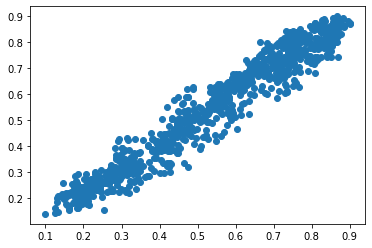

In [28]:
plt.scatter(Ytest1, predictions)

### Optimizador Levenberg–Marquardt

In [20]:
network = Input(Xtrain1.shape[1]) >> Sigmoid(12) >> Sigmoid(1)
optimizer = algorithms.LevenbergMarquardt(network,mu_update_factor=1,mu=0.001)
optimizer.train(Xtrain1, Ytrain1)
estimado=optimizer.predict(Xtest1)






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
Prefer Variable.assign which has equivalent behavior in 2.X.


In [21]:
estimado=optimizer.predict(Xtrain1)
sec, sae, r2=error(Ytrain1,estimado.reshape((Ytrain1.shape[0], 1)))
print(sec, sae, r2)

0.0003694261111258404 0.01487316273564325 0.9786767581213656


In [22]:
estimado=optimizer.predict(Xtest1)
sec, sae, r2=error(Ytest1,estimado.reshape((Ytest1.shape[0], 1)))
print(sec, sae, r2)

0.002202573274074616 0.03712794595686768 0.953961586618357


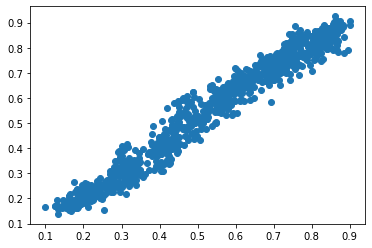

In [23]:
plt.scatter(Ytest1, estimado)

### Descenso de gradiente

In [28]:
no_nodes=12
alpha=(0.01)
iteraciones=1000
optimizacion1=[]
contador=0
w0,w1,b=neuronal_network(alpha, Xtrain1, Ytrain1, no_nodes,iteraciones)
layer_h = logistica(np.dot(Xtest1,w0)+b)
estimado = logistica(np.dot(layer_h,w1))
sec, sae, r2=error(Ytest1,estimado)
if abs(r2)>1:
    while abs(r2)>1:
        w0,w1,b=neuronal_network(alpha, Xtrain1, Ytrain1, no_nodes,iteraciones)
        layer_h = logistica(np.dot(Xtest1,w0)+b)
        estimado = logistica(np.dot(layer_h,w1))
        sec, sae, r2=error(Ytest1,estimado)
optimizacion1.append([no_nodes,sec, sae, r2])


In [29]:
#resultados prueba
optimizacion1

[[12, 0.00426117285444493, 0.05015516625931207, 0.9109325262080131]]

In [30]:
#resultados entrenamineto

estimado = logistica(np.dot(logistica(np.dot(Xtrain1,w0)+b),w1))
sec, sae, r2=error(Ytrain1,estimado.reshape((Ytrain1.shape[0], 1)))
print(sec, sae, r2)

0.0021848137330776687 0.0352457891483321 0.8738927480025687


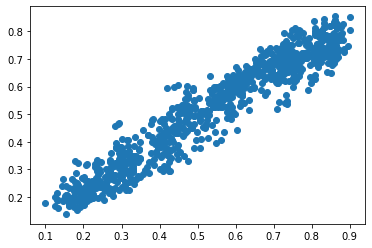

In [31]:
estimado = logistica(np.dot(layer_h,w1))
plt.scatter(Ytest1, estimado)

### Descenso de gradiente sin bias

In [32]:
no_nodes=12
alpha=(0.01)
iteraciones=1000
optimizacionsb=[]
contador=0
w0,w1=neuronal_network_sb(alpha, Xtrain1, Ytrain1, no_nodes,iteraciones)
layer_h = logistica(np.dot(Xtest1,w0))
estimado = logistica(np.dot(layer_h,w1))
sec, sae, r2=error(Ytest1,estimado)
if abs(r2)>1:
    while abs(r2)>1:
        w0,w1=neuronal_network_sb(alpha, Xtrain1, Ytrain1, no_nodes,iteraciones)
        layer_h = logistica(np.dot(Xtest1,w0))
        estimado = logistica(np.dot(layer_h,w1))
        sec, sae, r2=error(Ytest1,estimado)
optimizacionsb.append([no_nodes,sec, sae, r2])

In [33]:
optimizacionsb

[[12, 0.0037468157425962494, 0.047034072680967313, 0.9216836715250862]]

In [34]:
estimado = logistica(np.dot(logistica(np.dot(Xtrain1,w0)),w1))
sec, sae, r2=error(Ytrain1,estimado.reshape((Ytrain1.shape[0], 1)))
print(sec, sae, r2)

0.0022192586771935157 0.03472295724840878 0.8719045889289182


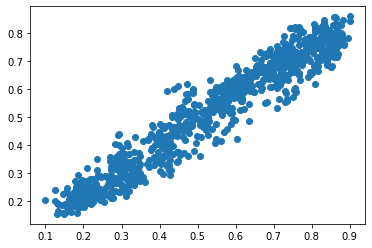

In [35]:
estimado = logistica(np.dot(layer_h,w1))
plt.scatter(Ytest1, estimado)

In [131]:
estaciones = [pd.read_csv(io.open('/home/noxd/Dropbox/REMAS/estaciones.csv', encoding='latin-1'))]
dataframes = [pd.read_csv(io.open(f, encoding='latin-1')) for f in filenames]
#https://stackoverflow.com/questions/30996289/utf8-codec-cant-decode-byte-0xf3
df = pd.concat(dataframes)
df = df[df['Estación'] != 'Estación']
estaciones1=df['Estación'].unique()
estaciones1.sort()
factores=["Temperatura_promedio","Humedad_relativa","Radiación_solar","Velocidad_del_viento","Presión_barométrica","Evapotranspiración"]
lista=[]
estacion=[]
noesta=0
count_nan=[]
lista_train=[]
lista_test=[]
for index, row in estaciones[0].iterrows(): 
    if  row[0] in  estaciones1:
        df1 = df[df['Estación'] == row[0]]
        df1['Fecha'] = pd.to_datetime(df1['Fecha'])
        df1[factores] = df1[factores].astype(float)
        df1['Fecha'] =  df1['Fecha'].dt.year + df1['Fecha'].dt.month/12
        df1 = df1.groupby('Fecha').mean()
        df1 = df1.loc[:, ~df1.columns.str.contains('^Unnamed')]
        df1['Estación']=row[0]
        df1['coordenaday']=row[2] 
        df1['coordenadax']=row[3] 
        if len(df1)==61:
            noesta=noesta+1
            lista.append(df1)
            estacion.append(row[0])
            #count_nan .append( len(df1) - df1.count())
remas = pd.concat(lista)
remas=remas.fillna(0)

/home/noxd/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/noxd/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [132]:
remas.reset_index(level=0, inplace=True)
Xremas=remas.loc[:, ~remas.columns.str.contains('Radiación_solar')]
Xremas=Xremas.loc[:, ~Xremas.columns.str.contains('Estación')]
Xremas=Xremas.astype(float).values


Yremas=remas["Radiación_solar"].astype(float).values
Yremas=Yremas.reshape(Yremas.shape[0],1)

In [133]:
maxminXremas, Xremasn=normalizary(Xremas)
maxminYremas, Yremasn=normalizary(Yremas)

In [134]:
estimado=optimizer.predict(Xremasn)
sec, sae, r2=error(Yremasn,estimado.reshape((Yremasn.shape[0], 1)))
print(sec, sae, r2)

0.052543756629487126 0.20136337267640864 -2.851282029126203


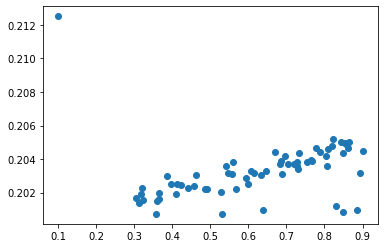

In [130]:
plt.scatter(Yremasn, estimado)

In [138]:
Xremas


array([[2015.5       ,   32.655     ,   38.505     , ...,    8.433125  ,
          30.77261   , -112.46161   ],
       [2015.58333333,   31.42419355,   48.46741935, ...,    7.13258065,
          30.77261   , -112.46161   ],
       [2015.66666667,   33.1416129 ,   45.73709677, ...,   10.99064516,
          30.77261   , -112.46161   ],
       ...,
       [2020.5       ,   29.69033333,   27.47933333, ...,    9.36766667,
          30.60731   , -111.40504   ],
       [2020.58333333,   31.75483871,   47.34290323, ...,    7.84258065,
          30.60731   , -111.40504   ],
       [2020.66666667,   32.15764706,   46.40235294, ...,    7.62470588,
          30.60731   , -111.40504   ]])